## Conditioning and Stability Lab:

### Problem 1:

In [5]:
import numpy as np
from scipy import linalg as la

def compute_condition(A):
    svd_vals = la.svdvals(A)
    if min(svd_vals) == 0:
        return np.inf
    else:
        return max(svd_vals) / min(svd_vals)


In [22]:
A = np.random.rand(4,4)
print(compute_condition(A) == np.linalg.cond(A))

A_ortho = la.qr(A)[0]
print(int(compute_condition(A_ortho)) == 1)

A_sing = np.array([[1, 0],
                   [1, 0]])
print(compute_condition(A_sing) == np.inf)

True
True
True


### Problem 2:

In [64]:
import sympy as sy
from matplotlib import pyplot as plt

def poly_experiment():
    w_roots = np.arange(1, 21)
    x, i = sy.symbols('x i')
    w = sy.poly_from_expr(sy.product(x-i, (i, 1, 20)))[0]
    w_coeffs = np.array(w.all_coeffs())
    
    orig_roots = np.roots(np.poly1d(w_coeffs))
    plt.plot(orig_roots.real, orig_roots.imag, '.', color='blue', ms=10)
    
    for i in range(100):
        r = np.random.normal(1, 1e-10, 21)
        new_coeffs = w_coeffs * r
        new_roots = np.roots(np.poly1d(new_coeffs))
        plt.plot(new_roots.real, new_roots.imag, ',', color='black')
    
    plt.xlabel('Real Axis')
    plt.ylabel('Imaginary Axis')
    plt.ylim([-6,6])
    plt.xlim([0,25])
    plt.show()

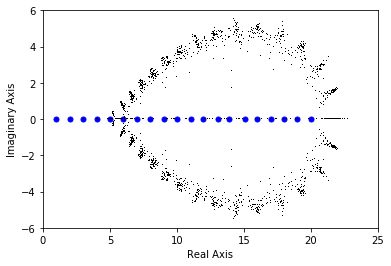

In [65]:
poly_experiment()

### Problem 3:

In [68]:
def eigenvalue_condition(A):
    reals = np.random.normal(0, 1e-10, A.shape)
    imags = np.random.normal(0, 1e-10, A.shape)
    H = reals + 1j*imags
    
    A_eigs = la.eigvals(A)
    AH_eigs = la.eigvals(A + H)
    
    abs_cond = la.norm(A_eigs - AH_eigs) / la.norm(H)
    rel_cond = (la.norm(A) / la.norm(A_eigs)) * abs_cond
    
    return abs_cond, rel_cond

### Problem 4:

In [144]:
# TODO: Fix me!

def plot_conditions(bounds, res):
    xmin, xmax, ymin, ymax = bounds
    A = np.array([[1, ]])
    
    x = np.linspace(xmin, xmax, res)
    y = np.linspace(ymin, ymax, res)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros((res,res))
    
    for i in range(res):
        for j in range(res):
            Z[i,j] = eigenvalue_condition(np.array([[1,x[i]],[y[i],i]]))[1]
    
    plt.pcolormesh(X, Y, Z, cmap='gray_r')
    plt.colorbar()
    plt.show()
    
    

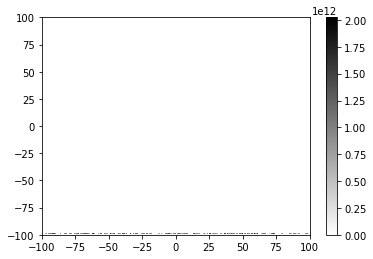

In [90]:
plot_conditions([-100, 100, -100, 100], 200)

In [117]:
def problem_5(n):
    xk, yk = np.load("stability_data.npy").T
    A = np.vander(xk, n+1)
    
    coeffs_normal = la.inv(A.T @ A) @ A.T @ yk
    
    Q, R = la.qr(A, mode='economic')
    coeffs_qr = la.solve_triangular(R, Q.T @ yk)
    
    err_normal = la.norm(A @ coeffs_normal - yk)
    err_qr = la.norm(A @ coeffs_qr - yk)
    
    y_normal = np.polyval(coeffs_normal, xk)
    y_qr = np.polyval(coeffs_qr, xk)
    
    plt.plot(xk, yk, '*', color='black', ms=2)
    plt.plot(xk, y_normal, label="Normal Equations")
    plt.plot(xk, y_qr, label="QR Solver")
    plt.xlim([0,1])
    plt.ylim([0,25])
    plt.legend()
    plt.show()
    
    return err_normal, err_qr

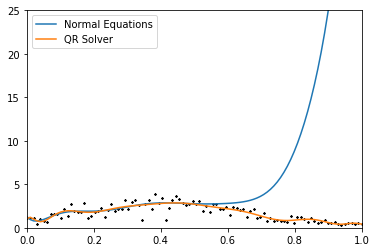

(157.8548096433658, 4.527556161403399)

In [130]:
problem_5(15)

### Problem 6:

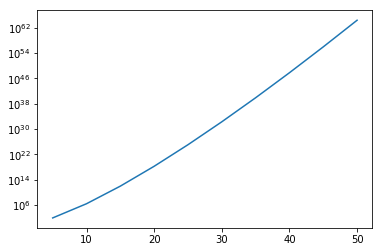

In [143]:
import math
from mpmath import *

def subfac(n):
    result = 0
    nfac = math.factorial(n)
    for k in range(n):
        result += (-1 ** k) / math.factorial(k)
    return result * nfac

x = sy.Symbol('x')

int_results = np.zeros(10)
i = 0
for n in np.arange(5, 51, 5):
    int_results[i] = sy.integrate(x**int(n) * sy.exp(x - 1), (x, 0, 1))
    i += 1


func_results = np.zeros(10)
i = 0
for n in np.arange(5, 51, 5):
    func_results[i] = ((-1 ** int(n)) * sy.subfactorial(int(n)) + 
                       (-1 ** int(n + 1)) * (sy.factorial(n) / mp.e))
    i += 1

err = abs(func_results - int_results)
plt.semilogy(range(5,51,5), err)
plt.show()
    

